# Eksplorasi

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

In [2]:
url = "https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json"

response = requests.get(url).json()
df = pd.json_normalize(response)
df.head()

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency
0,1,GOOGL,1/5/2017,3,675.51,501030,1,1,sell,EUR
1,2,NVDA,3/27/2017,13,559.39,51823,2,2,buy,ZAR
2,3,NFLX,11/7/2015,0,811.33,684430,3,3,sell,ZWL
3,4,MSFT,5/29/2017,22,231.21,237465,4,4,buy,IDR
4,5,JPM,11/8/2012,16,699.15,800344,5,5,buy,HRK


Harga beli saham tertinggi dalam IDR: 14567850.0


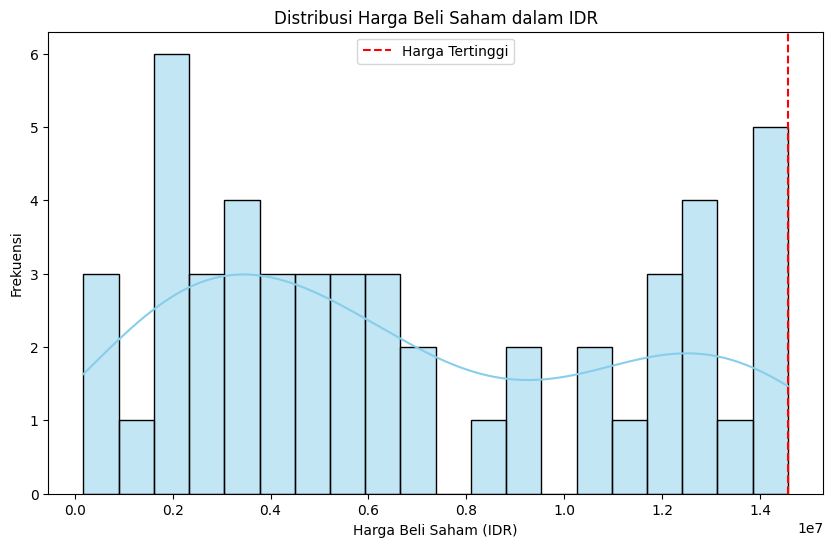

In [3]:
data = df[(df['currency'] == 'IDR')]
kurs_usd_to_idr = 15000
data.loc[:, 'trade_price_idr'] = data['trade_price'] * kurs_usd_to_idr

data_buy = data[data['trade_type'] == 'buy']

highest_buy_idr = data_buy['trade_price_idr'].max()

print("Harga beli saham tertinggi dalam IDR:", highest_buy_idr)

plt.figure(figsize=(10, 6))
sns.histplot(data_buy['trade_price_idr'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Harga Beli Saham dalam IDR')
plt.xlabel('Harga Beli Saham (IDR)')
plt.ylabel('Frekuensi')
plt.axvline(x=highest_buy_idr, color='red', linestyle='--', label='Harga Tertinggi')
plt.legend()
plt.show()

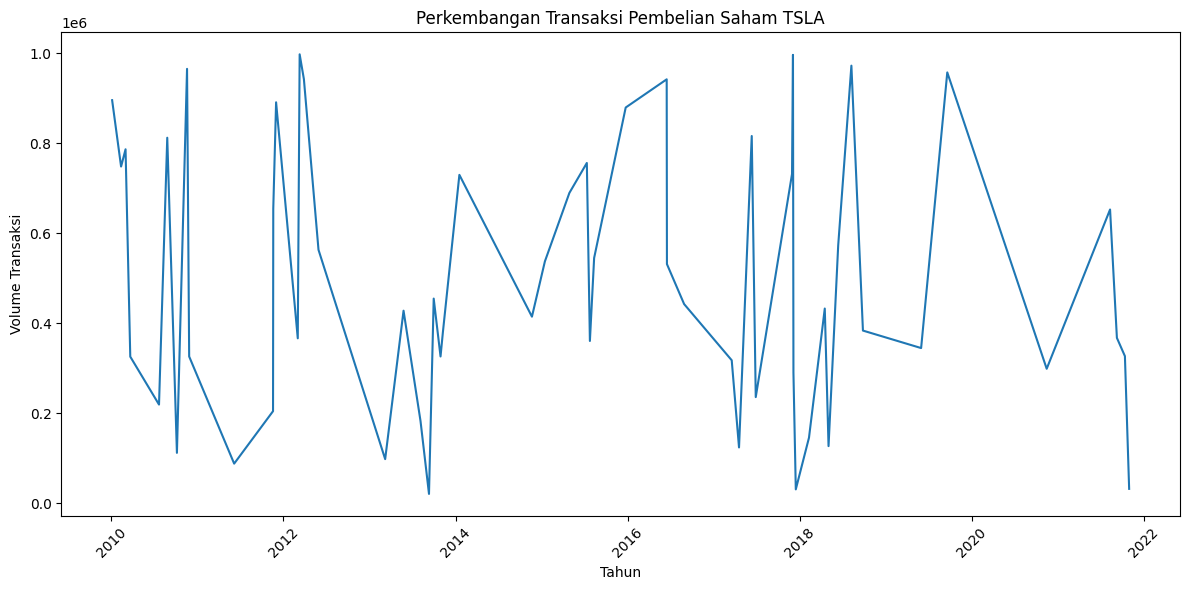

In [4]:
data_tsla_buy = df[(df['stock_symbol'] == 'TSLA') & (df['trade_type'] == 'buy')]

data_tsla_buy['trade_date'] = pd.to_datetime(data_tsla_buy['trade_date'])

data_tsla_buy = data_tsla_buy.sort_values(by='trade_date')

plt.figure(figsize=(12, 6))
sns.lineplot(x='trade_date', y='trade_volume', data=data_tsla_buy, estimator='sum', errorbar=None)
plt.title('Perkembangan Transaksi Pembelian Saham TSLA')
plt.xlabel('Tahun')
plt.ylabel('Volume Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

trade_type    buy  sell  total  persentase_jual  persentase_beli
stock_symbol                                                    
AAPL           35    40     75        53.333333        46.666667
AMZN           47    55    102        53.921569        46.078431
DIS            62    45    107        42.056075        57.943925
FB             49    57    106        53.773585        46.226415
GOOGL          62    43    105        40.952381        59.047619
JPM            60    46    106        43.396226        56.603774
MSFT           41    56     97        57.731959        42.268041
NFLX           53    48    101        47.524752        52.475248
NVDA           44    56    100        56.000000        44.000000
TSLA           57    44    101        43.564356        56.435644


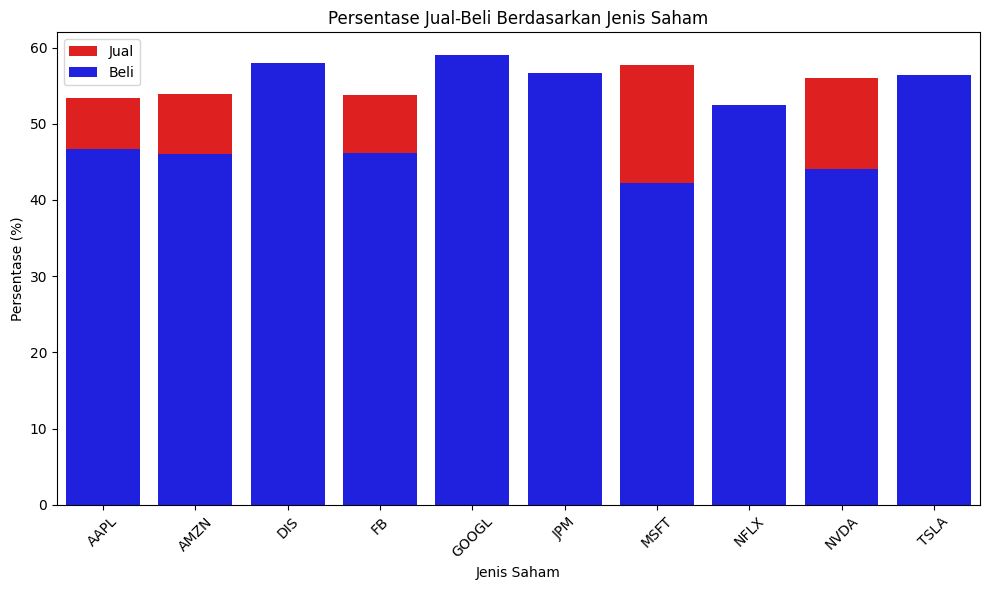

In [5]:
transaction_amount = df.groupby(['stock_symbol', 'trade_type']).size().unstack(fill_value=0)


transaction_amount['total'] = transaction_amount['buy'] + transaction_amount['sell']

transaction_amount['persentase_jual'] = (transaction_amount['sell'] / transaction_amount['total']) * 100
transaction_amount['persentase_beli'] = (transaction_amount['buy'] / transaction_amount['total']) * 100

print(transaction_amount)

plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_amount.index, y='persentase_jual', data=transaction_amount, color='red', label='Jual')
sns.barplot(x=transaction_amount.index, y='persentase_beli', data=transaction_amount, color='blue', label='Beli')
plt.title('Persentase Jual-Beli Berdasarkan Jenis Saham')
plt.xlabel('Jenis Saham')
plt.ylabel('Persentase (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Jenis transaksi yang banyak dilakukan, buy: 510


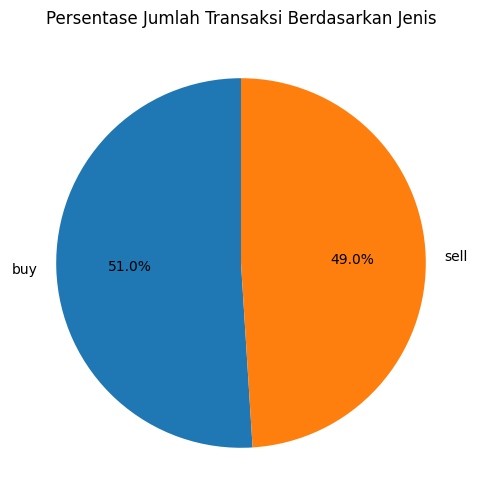

In [6]:
trade_type = df['trade_type'].value_counts()

print(f"Jenis transaksi yang banyak dilakukan, {trade_type.idxmax()}: {trade_type.max()}")

plt.figure(figsize=(10, 6))
plt.pie(trade_type, labels=trade_type.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Jumlah Transaksi Berdasarkan Jenis')
plt.show()

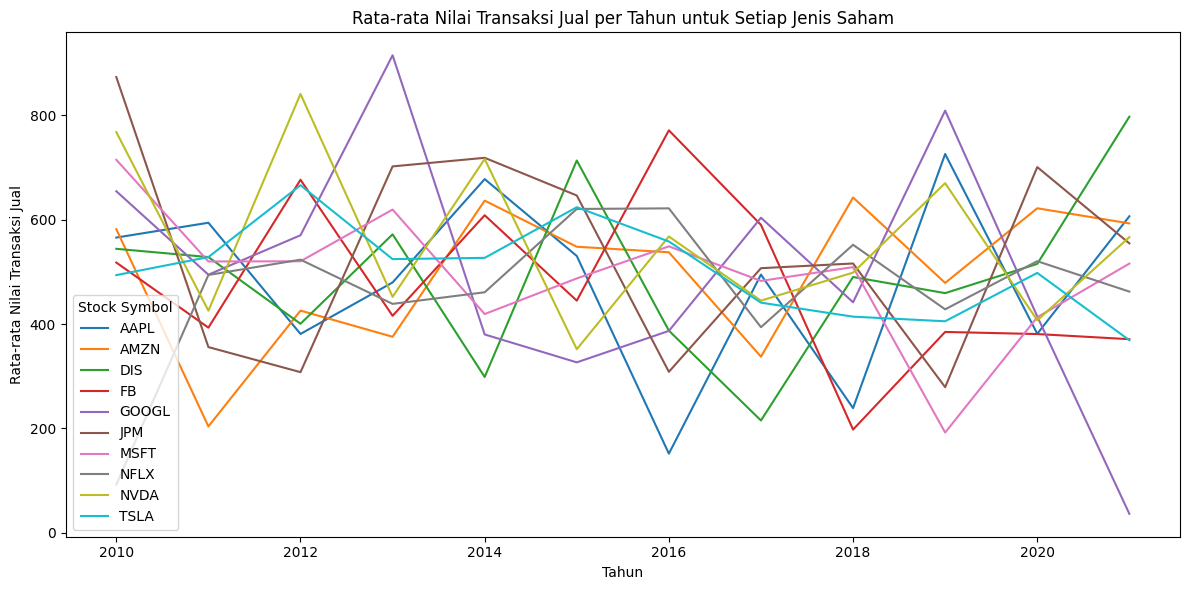

In [7]:
data_sell = df[df['trade_type'] == 'sell']

data_sell['trade_date'] = pd.to_datetime(data_sell['trade_date'])

data_sell['tahun'] = data_sell['trade_date'].dt.year

average_sell_value_per_year = data_sell.groupby(['tahun', 'stock_symbol'])['trade_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='tahun', y='trade_price', hue='stock_symbol', data=average_sell_value_per_year)
plt.title('Rata-rata Nilai Transaksi Jual per Tahun untuk Setiap Jenis Saham')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Nilai Transaksi Jual')
plt.legend(title='Stock Symbol')
plt.tight_layout()
plt.show()